In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',
              palette='dark', font_scale=1.2)
%matplotlib inline


In [2]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split Data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=69)

# Scale the training Input# Scale the training and testing sets separately
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
print(X_train_scaled[:5])
print(X_test_scaled[:5])
print(y_train[:5])
print(y_test[:5])


[[ 1.43172519  0.37674556  0.55901354  0.28328303]
 [ 0.07175184 -0.08190121  0.79438766  0.8350691 ]
 [-0.17551604  3.12862615 -1.32397943 -1.09618215]
 [ 0.68992155  0.37674556  0.91207472  1.52480168]
 [-0.54641786 -0.08190121  0.44132648  0.42122954]]
[[-1.04095363  1.29403909 -1.38282296 -1.37207518]
 [ 0.93718943 -0.31122459  0.50017001  0.14533651]
 [-0.54641786  0.83539232 -1.20629237 -1.37207518]
 [-0.0518821  -0.54054797  0.79438766  1.6627482 ]
 [-0.54641786  0.83539232 -1.32397943 -1.09618215]]
[1 2 0 2 1]
[0 1 0 2 0]


In [5]:
from sklearn.svm import SVC
model = SVC()
# Fit out model according to Training dataset
model.fit(X_train_scaled, y_train)
# Getting predictons from Testing data
y_pred = model.predict(X_test_scaled)

In [6]:
y_pred


array([0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1])

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [8]:
print(f"accuracy-Score:{accuracy}")
print(f"precision-Score:{precision}")
print(f"recall-Score:{recall}")
print(f"f1-Score:{f1}")


accuracy-Score:0.9736842105263158
precision-Score:0.9666666666666667
recall-Score:0.9777777777777779
f1-Score:0.9709618874773139


In [9]:
# Classification report -> all important score without us to find them manually
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      1.00      0.95         9
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Text(0, 0.5, 'y_pred')

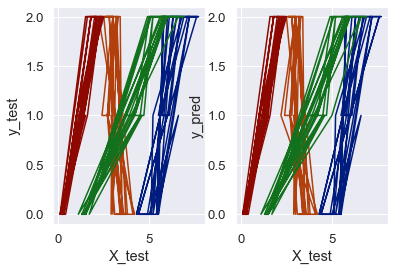

In [10]:
plt.figure(2, figsize=None)

plt.subplot(1, 2, 1)
plt.plot(X_test, y_test)
plt.xlabel("X_test")
plt.ylabel("y_test")

plt.subplot(1, 2, 2)
plt.plot(X_test, y_pred)
plt.xlabel("X_test")
plt.ylabel("y_pred")